## 练习1

尝试做这么一个模型，一个小球，在地面以速度v向上抛，每次落到地面回会弹起，速度变为原来的0.9，
请画出他弹跳10次的图像，横轴为时间，纵轴为y位移。

提示：需要求2阶导数，知道怎么搞吧，每次落地就停止计算，然后重新计算初值，然后重新开始，
是一个新的处置问题，不是一个方正就能算完的，用循环算10次。，同时记录每次弹起最高点的位置。

因为有二阶导数，所以y和y'都是需要求解的对象：
$$
\begin{cases}
y'=y'\\
y''=-9.8\\
\end{cases}
$$

In [1]:

from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# the ode


def dydt(t, y):
    return np.array([y[1], -9.8])

# hit the ground
def hitEvent(t, y):
    return y[0]
hitEvent.terminal = True
hitEvent.direction = -1

# hit the top
def topEvent(t, y):
    return y[1]

topEvent.direction = -1



c:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\zheng\anaconda3\envs\experiment\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:

t0 = 0
tf = 30
v0 = 20
# init position and speed
y0 = np.array([0, v0])
# this will receive the outpot
tOut = np.array([t0])
yOut = y0.reshape(2, 1)
# this receives y top and time
yTop = np.zeros([10, 2])

# bounce 10 times
for i in range(10):
    sol = solve_ivp(dydt, [t0, tf], y0, events=[
                    hitEvent, topEvent], max_step=0.2)
    # the time should be starting from the end of last round
    lastEndTime = tOut[-1]
    # concatenate the result to the previous results
    tOut = np.hstack((tOut, sol.t+lastEndTime))
    yOut = np.hstack((yOut, sol.y))
    # mark the top y, note the y is (y,y'), so take only the first
    # and the event only happend once, it is the second event in events as hitEvent is the first one
    yTop[i, 0] = sol.y_events[1][0, 0]
    # mark the time it reached top y
    yTop[i, 1] = sol.t_events[1][0]+lastEndTime

    # start all over with speed reduced
    y0[0] = 0
    y0[1] = -0.9 * sol.y[1][-1]


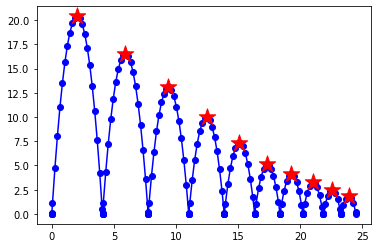

In [3]:
plt.scatter(yTop[:, 1], yTop[:, 0], c='r', marker='*', s=300, zorder=5)
plt.plot(tOut, yOut[0], c='b', marker='o')
